### language words is the core to understand the alphabet patterns. So this notebook will explore all possible word generating patterns in given language.

#### NOTE : this pattern of word can be used as New Language Creation

### English Language

In [3]:
## all the words of english collected from https://github.com/dwyl/english-wordshttps://github.com/dwyl/english-words
## which have around 370K words

In [46]:
import re
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import matplotlib.pyplot as plt

In [10]:
with open("language-words/english_words.json", "r") as fp:
    english_words = json.load(fp)
    
english_words = list(english_words.keys())
print("total words : ", len(english_words))

total words :  370101


In [43]:
## get count of each char in each word list.
count_vectorizer = CountVectorizer(token_pattern=r'\S')
english_words_count_vector = count_vectorizer.fit_transform(english_words)

english_words_count_vector.shape

(370101, 27)

In [44]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\S')
english_words_tfidf_vector = tfidf_vectorizer.fit_transform(english_words)

english_words_tfidf_vector.shape

(370101, 27)

Text(0, 0.5, 'word index in the corpus')

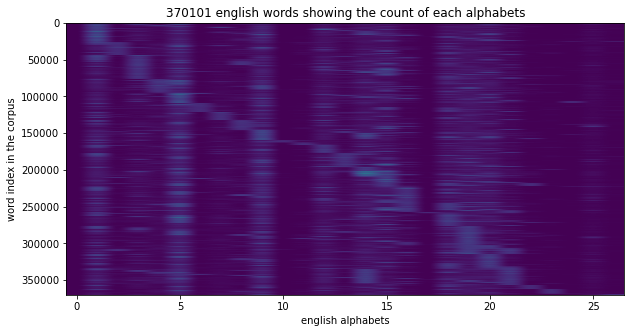

In [51]:
## plotting graph of count-vector on english language

fig = plt.figure(figsize=(10,5))
plt.imshow(english_words_count_vector.toarray(), aspect="auto")

plt.title(f"{english_words_count_vector.shape[0]} english words showing the count of each alphabets")
plt.xlabel("english alphabets")
plt.ylabel("word index in the corpus")

Text(0, 0.5, 'word index in the corpus')

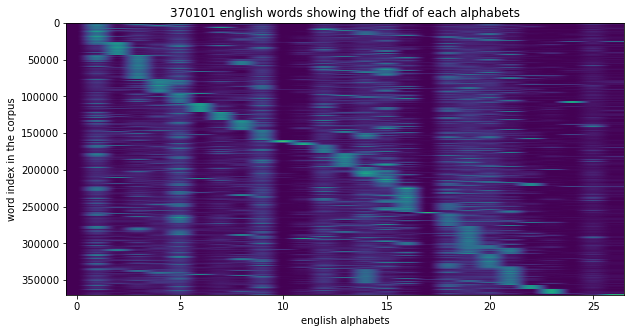

In [52]:
## plotting graph of tfidf-vector on english language

fig = plt.figure(figsize=(10,5))
plt.imshow(english_words_tfidf_vector.toarray(), aspect="auto")

plt.title(f"{english_words_tfidf_vector.shape[0]} english words showing the tfidf of each alphabets")
plt.xlabel("english alphabets")
plt.ylabel("word index in the corpus")